In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
#Loading the dataset
url = "https://github.com/Premalatha-success/Financial-Analytics-Loan-Approval-Prediction/raw/main/loan_prediction.csv"
loan_data = pd.read_csv(url)

In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
missing_values = loan_data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [ ]:
# Handling missing values
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)

# Filling missing values
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median(), inplace=True)

In [ ]:
label_encoder = LabelEncoder()

# Encode categorical variables
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
for col in categorical_cols:
    loan_data[col] = label_encoder.fit_transform(loan_data[col])

# Encode target variable
loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'Y': 1, 'N': 0})

In [ ]:
print(loan_data.describe())

           Gender     Married  Dependents   Education  Self_Employed  \
count  614.000000  614.000000  614.000000  614.000000     614.000000   
mean     0.817590    0.653094    0.744300    0.218241       0.133550   
std      0.386497    0.476373    1.009623    0.413389       0.340446   
min      0.000000    0.000000    0.000000    0.000000       0.000000   
25%      1.000000    0.000000    0.000000    0.000000       0.000000   
50%      1.000000    1.000000    0.000000    0.000000       0.000000   
75%      1.000000    1.000000    1.000000    0.000000       0.000000   
max      1.000000    1.000000    3.000000    1.000000       1.000000   

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  145.752443        342.410423   
std        6109.041673        2926.248369   84.107233         64.428629   
min         150.000000           0.000000    9.0000

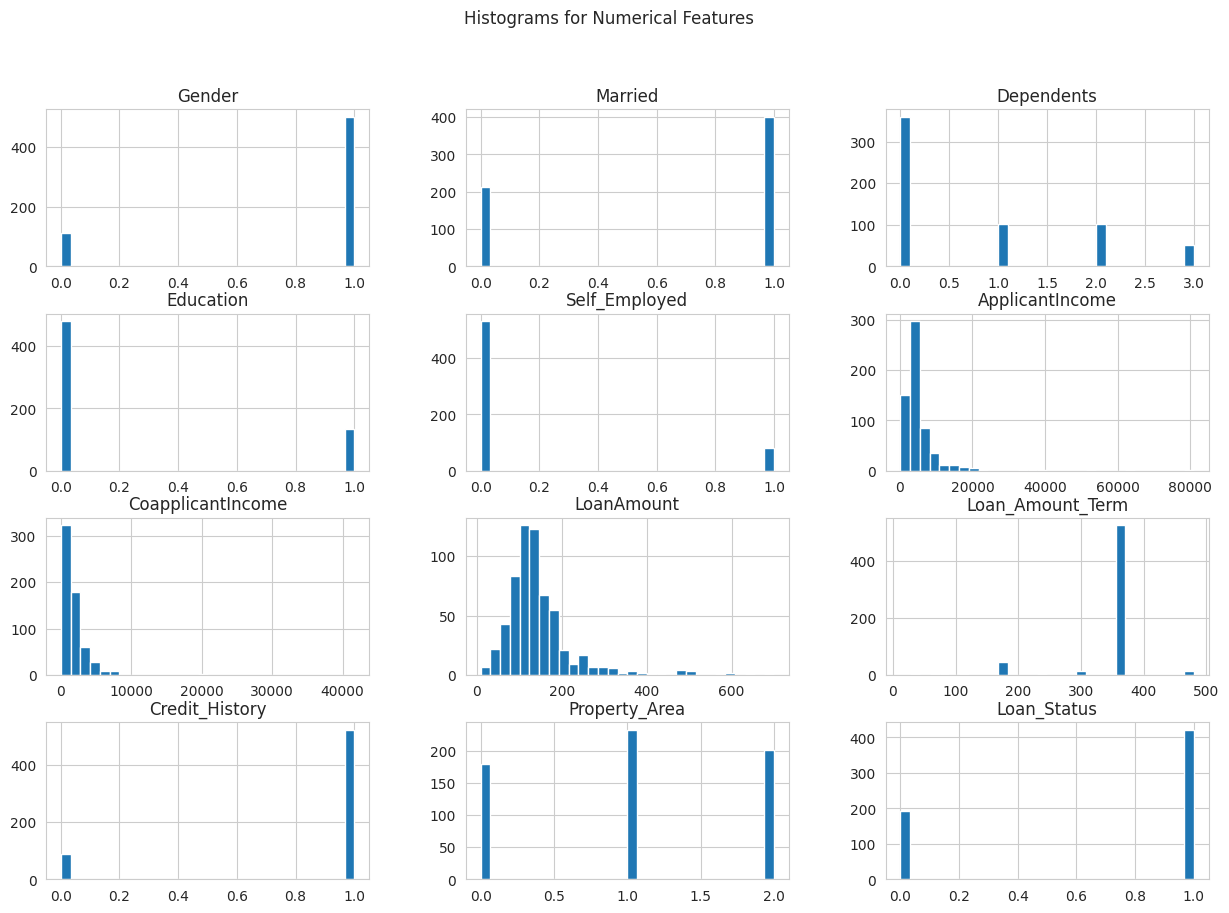

In [ ]:
sns.set_style("whitegrid")

# Histograms for numerical features
loan_data.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms for Numerical Features')
plt.show()

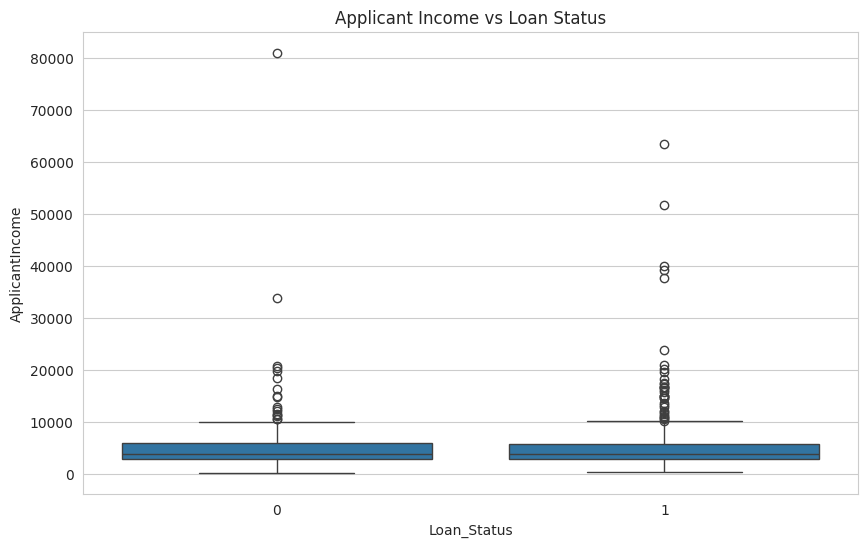

In [ ]:
# Box plot for Applicant Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=loan_data)
plt.title('Applicant Income vs Loan Status')
plt.show()

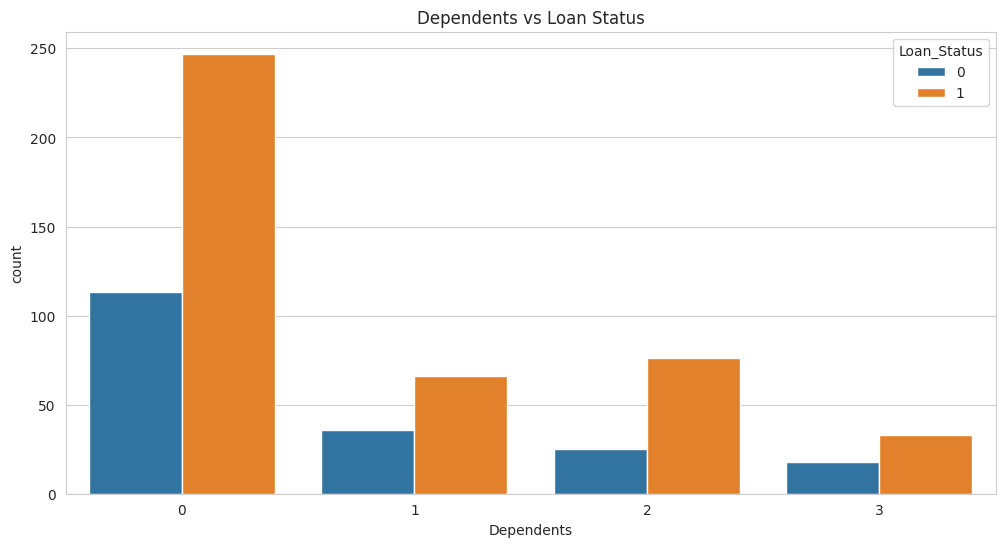

In [ ]:
# Count plot for categorical features
plt.figure(figsize=(12, 6))
sns.countplot(x='Dependents', hue='Loan_Status', data=loan_data)
plt.title('Dependents vs Loan Status')
plt.show()

In [ ]:
# Features and target variable
X = loan_data.drop(['Loan_Status', 'Loan_ID'], axis=1)
y = loan_data['Loan_Status']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Training logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Evaluating the model
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression Accuracy: 0.8373983739837398
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



In [ ]:
# Training KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluating the model
y_pred_knn = knn.predict(X_test)
print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Classifier Accuracy: 0.6504065040650406
              precision    recall  f1-score   support

           0       0.29      0.21      0.25        33
           1       0.74      0.81      0.77        90

    accuracy                           0.65       123
   macro avg       0.51      0.51      0.51       123
weighted avg       0.62      0.65      0.63       123



In [ ]:
# Training SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Evaluating the model
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.8292682926829268
              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



In [ ]:
# Training decision tree model
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)

# Evaluating the model
y_pred_tree = decision_tree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

Decision Tree Accuracy: 0.6422764227642277
              precision    recall  f1-score   support

           0       0.37      0.48      0.42        33
           1       0.79      0.70      0.74        90

    accuracy                           0.64       123
   macro avg       0.58      0.59      0.58       123
weighted avg       0.68      0.64      0.66       123



In [ ]:
# Training bagging classifier
bagging_clf = BaggingClassifier(random_state=0)
bagging_clf.fit(X_train, y_train)

# Evaluating the model
y_pred_bagging = bagging_clf.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))

Bagging Classifier Accuracy: 0.7479674796747967
              precision    recall  f1-score   support

           0       0.53      0.64      0.58        33
           1       0.86      0.79      0.82        90

    accuracy                           0.75       123
   macro avg       0.69      0.71      0.70       123
weighted avg       0.77      0.75      0.75       123



In [ ]:
# Training gradient boosting model
grad_boost = GradientBoostingClassifier(random_state=0)
grad_boost.fit(X_train, y_train)

# Evaluating the model
y_pred_gb = grad_boost.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8130081300813008
              precision    recall  f1-score   support

           0       0.73      0.48      0.58        33
           1       0.83      0.93      0.88        90

    accuracy                           0.81       123
   macro avg       0.78      0.71      0.73       123
weighted avg       0.80      0.81      0.80       123



In [ ]:
# Training AdaBoost model
ada_boost = AdaBoostClassifier(random_state=0)
ada_boost.fit(X_train, y_train)

# Evaluating the model
y_pred_ada = ada_boost.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

AdaBoost Accuracy: 0.8211382113821138
              precision    recall  f1-score   support

           0       0.74      0.52      0.61        33
           1       0.84      0.93      0.88        90

    accuracy                           0.82       123
   macro avg       0.79      0.72      0.75       123
weighted avg       0.81      0.82      0.81       123



In [ ]:

# Evaluating models using cross-validation
models = {
    'Logistic Regression': log_reg,
    'KNN': knn,
    'SVM': svm,
    'Decision Tree': decision_tree,
    'Bagging': bagging_clf,
    'Gradient Boosting': grad_boost,
    'AdaBoost': ada_boost
}

# Dictionary to store cross-validation scores
cv_results = {}

# Performing cross-validation for each model
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    cv_results[model_name] = scores.mean()
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

Logistic Regression Cross-Validation Accuracy: 0.7942 ± 0.0376
KNN Cross-Validation Accuracy: 0.6456 ± 0.0239
SVM Cross-Validation Accuracy: 0.7698 ± 0.0304
Decision Tree Cross-Validation Accuracy: 0.6944 ± 0.0265
Bagging Cross-Validation Accuracy: 0.7373 ± 0.0178
Gradient Boosting Cross-Validation Accuracy: 0.7760 ± 0.0341
AdaBoost Cross-Validation Accuracy: 0.7800 ± 0.0386


In [ ]:
# Identifying the best-performing model based on cross-validation accuracy
best_model_name = max(cv_results, key=cv_results.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} with Cross-Validation Accuracy: {cv_results[best_model_name]:.4f}")


Best Model: Logistic Regression with Cross-Validation Accuracy: 0.7942


In [ ]:
# Defining parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# Initializing GridSearchCV
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, n_jobs=-1, verbose=2)

# Fitting GridSearchCV
grid_search.fit(X_train, y_train)

# Best hyperparameters and best model
best_params = grid_search.best_params_
best_model_tuned = grid_search.best_estimator_

print(f"Best Hyperparameters for Logistic Regression: {best_params}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for Logistic Regression: {'C': 0.1, 'solver': 'lbfgs'}


In [ ]:
# Predicting on the test data using the best-tuned model
y_test_pred = best_model_tuned.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

# Print evaluation metrics
print("\nModel Evaluation on Test Data:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Model Evaluation on Test Data:
Accuracy: 0.8374
Precision: 0.8302
Recall: 0.9778
F1-Score: 0.8980


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



In [ ]:
#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[15 18]
 [ 2 88]]


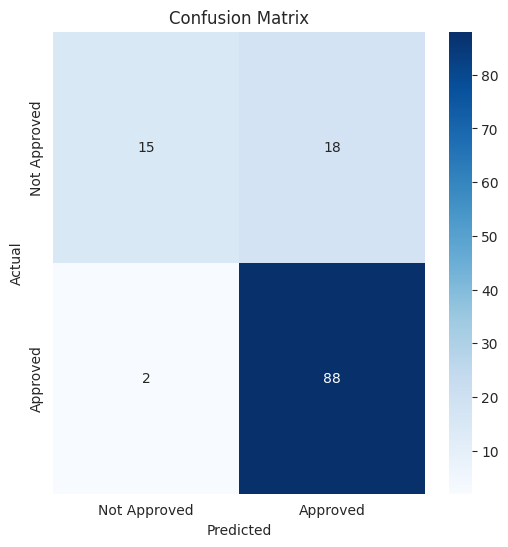

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Approved', 'Approved'], yticklabels=['Not Approved', 'Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()